In [41]:
!pip install wordcloud
!pip install nltk

In [42]:
# Importing the libraries for visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Importing the libraries for text processing
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import confusion_matrix

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Importing the libraries for model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a1kin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\a1kin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\a1kin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
#reading the dataset
# df = pd.read_csv('StackGrab.csv')
df = pd.read_csv('Stack_Overflow_New.csv')

In [44]:
df.head()

,title,markdown,tag1,tag2,tag3,tag4,count_answers,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Pass parameter from .sh file to .yml file?,I am new to Ansible as well as Ubuntu system ...,shell,ansible,NaN,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Difficulties sending multipart/form-data reque...,"please, this is y concern: I'll like to know ...",java,rest,postman,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The server response was: 4.7.0 Temporary serve...,I just setup an Exchange 2013 server hosted o...,exchange-server,exchange-server-2013,NaN,NaN,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,How to fetch a Facebook user's public informat...,I am trying to fetch a Facebook user's public...,facebook,facebook-graph-api,facebook-fql,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aggregate hourly data into daily aggregates fo...,I have multiple .TXT files in the following f...,r,merge,aggregate,txt,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df.shape

(15110, 21)

In [46]:
df.columns

Index(['title', 'markdown', 'tag1', 'tag2', 'tag3', 'tag4', 'count_answers',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20'],
      dtype='object')

In [47]:
df.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20'],axis=1,inplace=True)

In [48]:
df.shape

(15110, 7)

In [49]:
df.columns

Index(['title', 'markdown', 'tag1', 'tag2', 'tag3', 'tag4', 'count_answers'], dtype='object')

In [50]:
#checking null values in the tag columns
df['markdown'].isnull().sum()


26

In [51]:
df['title'] = df['title'].replace(np.nan,' ')
df['markdown'] = df['markdown'].replace(np.nan,' ')
df['tag1'] = df['tag1'].replace(np.nan,' ')
df['tag2'] = df['tag2'].replace(np.nan,' ')
df['tag3'] = df['tag3'].replace(np.nan,' ')
df['tag4'] = df['tag4'].replace(np.nan,' ')
df['count_answers'] = df['count_answers'].replace(np.nan,' ')

In [52]:

df['Tags']=df['tag1']+' '+df['tag2']+' '+df['tag3']+' '+df['tag4']

In [53]:
df['Tags']=df['Tags'].str.lower()
df['Tags']=df['Tags'].apply(lambda x:x.lstrip())
df['Tags']=df['Tags'].apply(lambda x:x.rstrip())

In [54]:
df.head()

,title,markdown,tag1,tag2,tag3,tag4,count_answers,Tags
0,Pass parameter from .sh file to .yml file?,I am new to Ansible as well as Ubuntu system ...,shell,ansible,,,2,shell ansible
1,Difficulties sending multipart/form-data reque...,"please, this is y concern: I'll like to know ...",java,rest,postman,,2,java rest postman
2,The server response was: 4.7.0 Temporary serve...,I just setup an Exchange 2013 server hosted o...,exchange-server,exchange-server-2013,,,4,exchange-server exchange-server-2013
3,How to fetch a Facebook user's public informat...,I am trying to fetch a Facebook user's public...,facebook,facebook-graph-api,facebook-fql,,1,facebook facebook-graph-api facebook-fql
4,Aggregate hourly data into daily aggregates fo...,I have multiple .TXT files in the following f...,r,merge,aggregate,txt,3,r merge aggregate txt


In [55]:
df.count_answers.unique()

array(['2', '4', '1', '3', '0', ' ', '28', '12', 'python-decorators',
       'ccxt', '8', '7', 'angular', '11', 'nestjs', 'bash', ' b. ... "',
       '5', '17', 'terminology', '16', '13', 'checked', '39',
       'troposphere', 'pycharm', '6', 'autocomplete', ' "... "', 'x',
       '10', 'ruby-on-rails', 'hcaptcha', 'pubnub', 'python-venv', '55',
       'customtkinter', '14', '9', 'angularfire',
       'i)); return 0; } int ... "', 'preflight', 'css', 'flask', 'menu',
       'react-query', 'phylogeny', ' "Poland"', 'vuejs3', 'sql',
       'discord.py', 'jsonb', 'qml', '48', 'postgresql-14', 'dataframe',
       'listitem', 'pytorch', '22', 'suitescript2.0', 'directory',
       'asp.net-web-api', 'stripe-payments', '.net-8.0', '21', '19', '53',
       'facet-wrap', 'python', ' "values": ["A"',
       'firebase-cloud-messaging', 'igraph', 'unordered-map', '27', '30',
       'feature-engineering', 'jsonata', '35', 'linq', '54', 'r', '45',
       'powerquery', 'mongodb', 'rdp', 'json', 'snow

In [56]:
df['count_answers'] = pd.to_numeric(df['count_answers'], errors='coerce')
df['count_answers'] = df['count_answers'].apply(lambda x: 1 if x == 0 else 0)


In [57]:
df.rename(columns={'count_answers': 'OpenStatus'}, inplace=True)


In [58]:
df.OpenStatus.unique()

array([0, 1], dtype=int64)

In [59]:
df.head()

,title,markdown,tag1,tag2,tag3,tag4,OpenStatus,Tags
0,Pass parameter from .sh file to .yml file?,I am new to Ansible as well as Ubuntu system ...,shell,ansible,,,0,shell ansible
1,Difficulties sending multipart/form-data reque...,"please, this is y concern: I'll like to know ...",java,rest,postman,,0,java rest postman
2,The server response was: 4.7.0 Temporary serve...,I just setup an Exchange 2013 server hosted o...,exchange-server,exchange-server-2013,,,0,exchange-server exchange-server-2013
3,How to fetch a Facebook user's public informat...,I am trying to fetch a Facebook user's public...,facebook,facebook-graph-api,facebook-fql,,0,facebook facebook-graph-api facebook-fql
4,Aggregate hourly data into daily aggregates fo...,I have multiple .TXT files in the following f...,r,merge,aggregate,txt,0,r merge aggregate txt


In [60]:
df['markdown'] = df['markdown'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s.]', '', x))
df['markdown'] = df['markdown'].apply(lambda x: re.sub(r'[<>!/-]', '', x))


In [61]:
df.head()

,title,markdown,tag1,tag2,tag3,tag4,OpenStatus,Tags
0,Pass parameter from .sh file to .yml file?,I am new to Ansible as well as Ubuntu system ...,shell,ansible,,,0,shell ansible
1,Difficulties sending multipart/form-data reque...,please this is y concern Ill like to know how...,java,rest,postman,,0,java rest postman
2,The server response was: 4.7.0 Temporary serve...,I just setup an Exchange 2013 server hosted o...,exchange-server,exchange-server-2013,,,0,exchange-server exchange-server-2013
3,How to fetch a Facebook user's public informat...,I am trying to fetch a Facebook users public ...,facebook,facebook-graph-api,facebook-fql,,0,facebook facebook-graph-api facebook-fql
4,Aggregate hourly data into daily aggregates fo...,I have multiple .TXT files in the following f...,r,merge,aggregate,txt,0,r merge aggregate txt


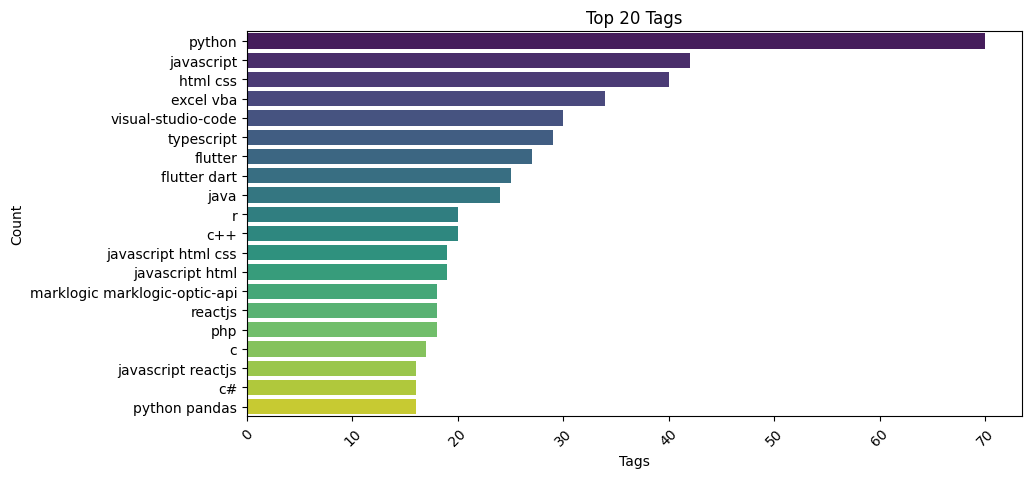

In [62]:

# Assuming 'df' is your original DataFrame
top_tags = df['Tags'].value_counts().iloc[1:21]
# top_tags = df['Tags'].value_counts().head(20)

# Plotting the top 20 tags
plt.figure(figsize=(10, 5))
sns.barplot(y=top_tags.index,x= top_tags.values, palette='viridis',hue=top_tags.index)
plt.title('Top 20 Tags')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()





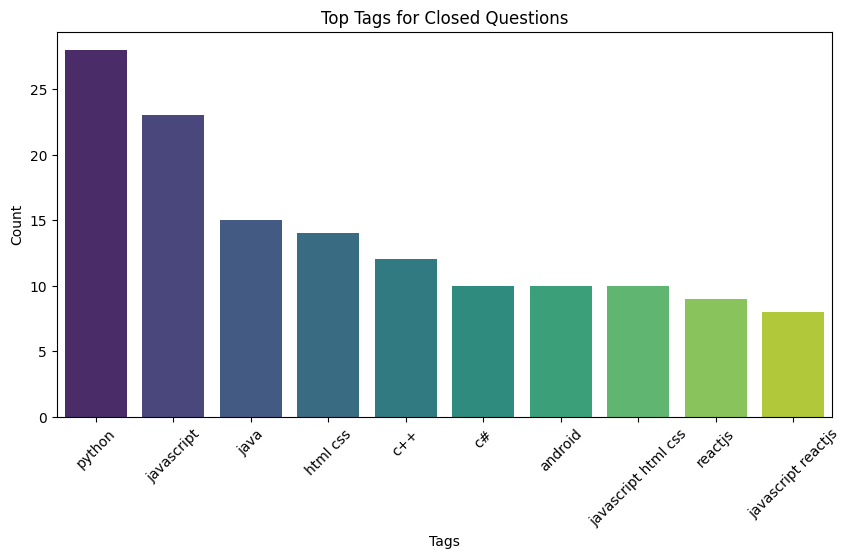

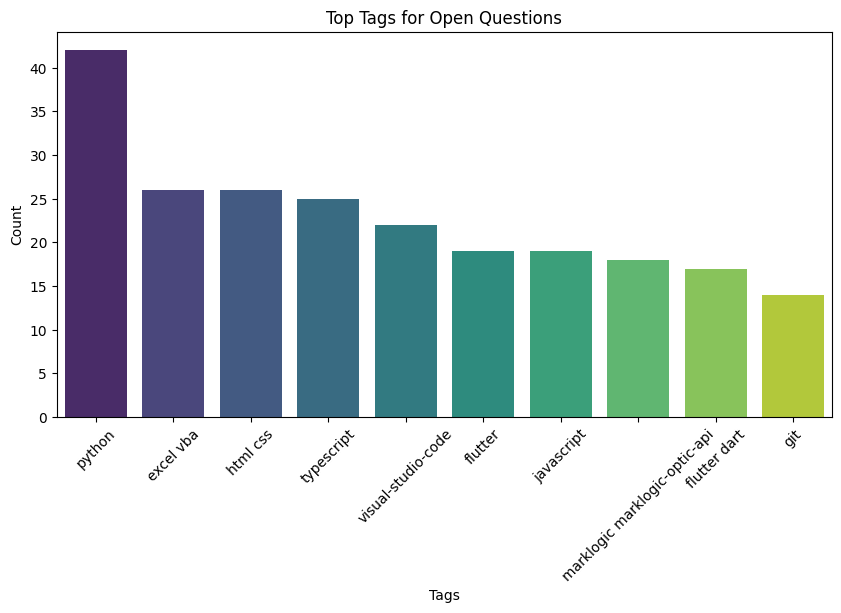

In [63]:
# Filter closed questions
closed_questions = df[df['OpenStatus'] == 1]

# Filter open questions
open_questions = df[df['OpenStatus'] == 0]

# Get top tags for closed questions
top_tags_closed = closed_questions['Tags'].value_counts().head(10)

# Get top tags for open questions
top_tags_open = open_questions['Tags'].value_counts().iloc[1:11]



# Plotting the top 20 tags for closed questions
plt.figure(figsize=(10, 5))
sns.barplot(x=top_tags_closed.index,y= top_tags_closed.values, palette='viridis',hue=top_tags_closed.index)
plt.title('Top Tags for Closed Questions')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plotting the top 20 tags for open questions
plt.figure(figsize=(10, 5))
sns.barplot(y=top_tags_open.values,x= top_tags_open.index, palette='viridis',hue=top_tags_open.index,legend=False )
# sns.barplot(x=top_open_tags.index, y=top_open_tags.values, palette='viridis',hue=top_open_tags.values,)
plt.title('Top Tags for Open Questions')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


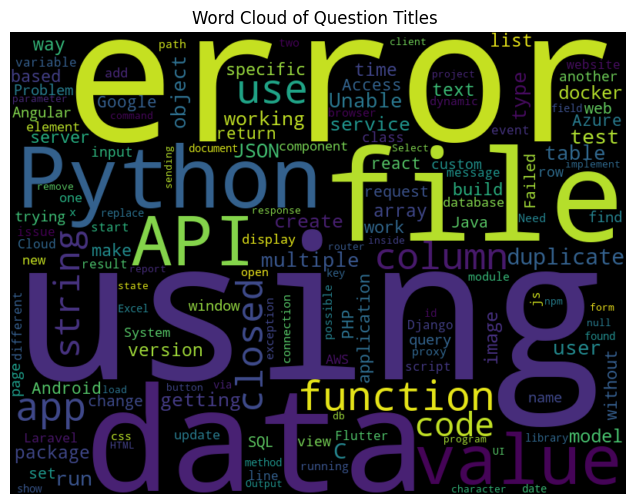

In [64]:

text = " ".join(title for title in df['title'][:1000])

wordcloud = WordCloud(width=800, height=600, max_words=150).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Question Titles ")
plt.show()

In [65]:
df.head()

,title,markdown,tag1,tag2,tag3,tag4,OpenStatus,Tags
0,Pass parameter from .sh file to .yml file?,I am new to Ansible as well as Ubuntu system ...,shell,ansible,,,0,shell ansible
1,Difficulties sending multipart/form-data reque...,please this is y concern Ill like to know how...,java,rest,postman,,0,java rest postman
2,The server response was: 4.7.0 Temporary serve...,I just setup an Exchange 2013 server hosted o...,exchange-server,exchange-server-2013,,,0,exchange-server exchange-server-2013
3,How to fetch a Facebook user's public informat...,I am trying to fetch a Facebook users public ...,facebook,facebook-graph-api,facebook-fql,,0,facebook facebook-graph-api facebook-fql
4,Aggregate hourly data into daily aggregates fo...,I have multiple .TXT files in the following f...,r,merge,aggregate,txt,0,r merge aggregate txt


In [66]:
df.drop(['tag1','tag2','tag3','tag4'],axis=1,inplace=True)

In [67]:
df.head()

,title,markdown,OpenStatus,Tags
0,Pass parameter from .sh file to .yml file?,I am new to Ansible as well as Ubuntu system ...,0,shell ansible
1,Difficulties sending multipart/form-data reque...,please this is y concern Ill like to know how...,0,java rest postman
2,The server response was: 4.7.0 Temporary serve...,I just setup an Exchange 2013 server hosted o...,0,exchange-server exchange-server-2013
3,How to fetch a Facebook user's public informat...,I am trying to fetch a Facebook users public ...,0,facebook facebook-graph-api facebook-fql
4,Aggregate hourly data into daily aggregates fo...,I have multiple .TXT files in the following f...,0,r merge aggregate txt


In [68]:
#text preprocessing
def preprocess_text(text):
    #convert to lowercase
    text = text.lower()
    
    #remove HTML tags
    text = remove_html_tags(text)
    
    #remove URL tags
    text = remove_urls(text)
    
    #remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    #tokenize the text into individual words
    tokens = word_tokenize(text)
    
    #remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    #lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    #join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

#function to remove HTML tags
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

#function to remove URL links
def remove_urls(text):
    pattern = re.compile(r'http\S+|www\S+')
    return pattern.sub(r'', text)

#apply preprocessing to the 'Title' and 'BodyMarkdown' columns
df['title'] = df['title'].apply(preprocess_text)
df['markdown'] = df['markdown'].apply(preprocess_text)
df['Tags'] = df['Tags'].apply(preprocess_text)

#display the preprocessed dataset
df.head()

,title,markdown,OpenStatus,Tags
0,pas parameter sh file yml file,new ansible well ubuntu system also want pas m...,0,shell ansible
1,difficulty sending multipart form data request...,please concern ill like know query web service...,0,java rest postman
2,server response temporary server error please ...,setup exchange server hosted machine active do...,0,exchange server exchange server
3,fetch facebook user public information faceboo...,trying fetch facebook user public information ...,0,facebook facebook graph api facebook fql
4,aggregate hourly data daily aggregate mutlitpl...,multiple txt file following format v v v v w kwh,0,r merge aggregate txt


In [69]:
#splitting the dataset into train and test set
x = df['title'] + ' '+ df['markdown']+' '+df['Tags']
y = df['OpenStatus']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 203)

In [70]:
xtrain.head()

10106    typescript code repository used like shared li...
8252     c winforms button form hide form form form for...
2022     detect window vertical scrollbar appears simpl...
1750     set git ssl verify specific repos use git serv...
9282     rotues matched angular new angular trying navi...
dtype: object

In [71]:
xtest.head()

2736     dao query annotates room table name curious en...
8580     angular universal app show server side hosting...
4319     language used schema need match html lang attr...
13358    read virtualized registry value msix packaged ...
8080     getting error instead token expired token pass...
dtype: object

In [72]:
#converting words to numbers using TF-IDF ie performing vectorization

vectorizer = TfidfVectorizer(max_features=7000)
xtrain_tfidf = vectorizer.fit_transform(xtrain).toarray()  # converting words to numbers for train data 
xtest_tfidf = vectorizer.transform(xtest).toarray()        # converting words to numbers for test data 

In [73]:
xtrain_tfidf.shape

(10577, 7000)

In [74]:
df.shape

(15110, 4)

In [75]:

model = Sequential()
model.add(Dense(16, input_dim=xtrain_tfidf.shape[1], activation='relu'))  
model.add(Dense(4, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(xtrain_tfidf, ytrain, epochs=10, batch_size=32, validation_data=(xtest_tfidf,ytest))
loss, accuracy = model.evaluate(xtest_tfidf, ytest)
print('Test Accuracy:', accuracy)

Epoch 1/10
331/331 [==============================] - 4s 8ms/step - loss: 0.6650 - accuracy: 0.6063 - val_loss: 0.6440 - val_accuracy: 0.6274
Epoch 2/10
331/331 [==============================] - 2s 7ms/step - loss: 0.5853 - accuracy: 0.6976 - val_loss: 0.6367 - val_accuracy: 0.6433
Epoch 3/10
331/331 [==============================] - 2s 6ms/step - loss: 0.4819 - accuracy: 0.7823 - val_loss: 0.6794 - val_accuracy: 0.6386
Epoch 4/10
331/331 [==============================] - 2s 6ms/step - loss: 0.3983 - accuracy: 0.8266 - val_loss: 0.7417 - val_accuracy: 0.6364
Epoch 5/10
331/331 [==============================] - 2s 7ms/step - loss: 0.3255 - accuracy: 0.8681 - val_loss: 0.8201 - val_accuracy: 0.6201
Epoch 6/10
331/331 [==============================] - 2s 7ms/step - loss: 0.2590 - accuracy: 0.9036 - val_loss: 0.9033 - val_accuracy: 0.6311
Epoch 7/10
331/331 [==============================] - 2s 6ms/step - loss: 0.1976 - accuracy: 0.9322 - val_loss: 0.9993 - val_accuracy: 0.6303
Epoch 

In [76]:
y_pred = model.predict(xtest_tfidf)

print(y_pred)

142/142 [==============================] - 0s 3ms/step
[[0.05924093]
 [0.9972621 ]
 [0.94080096]
 ...
 [0.00658794]
 [0.6431832 ]
 [0.00238738]]


In [77]:


# Convert continuous predictions to binary values using a threshold
y_pred_binary = (y_pred > 0.5).astype(int)

print(classification_report(ytest, y_pred_binary))



              precision    recall  f1-score   support

           0       0.68      0.71      0.70      2767
           1       0.51      0.47      0.49      1766

    accuracy                           0.62      4533
   macro avg       0.60      0.59      0.59      4533
weighted avg       0.61      0.62      0.62      4533



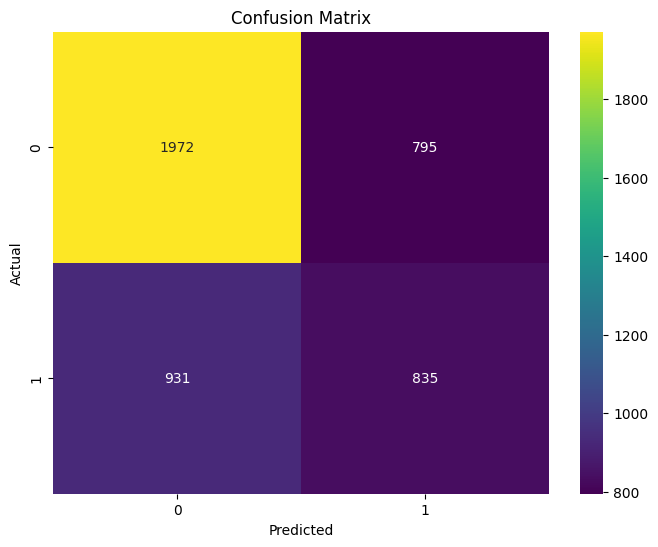

In [78]:

conf_matrix = confusion_matrix(ytest, y_pred_binary)
conf_matrix


# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
